In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Impoting the required packages
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing.
import seaborn as sns
import random
import plotly.express as px
import matplotlib.pyplot as plt #For plotting

In [ ]:
# Importing the CSV file
apr ='/content/drive/My Drive/Colab Notebooks/datasets/uber_data/uber-raw-data-apr14.csv'
aug ='/content/drive/My Drive/Colab Notebooks/datasets/uber_data/uber-raw-data-aug14.csv'
jul ='/content/drive/My Drive/Colab Notebooks/datasets/uber_data/uber-raw-data-jul14.csv'
jun ='/content/drive/My Drive/Colab Notebooks/datasets/uber_data/uber-raw-data-jun14.csv'
may ='/content/drive/My Drive/Colab Notebooks/datasets/uber_data/uber-raw-data-may14.csv'
sep ='/content/drive/My Drive/Colab Notebooks/datasets/uber_data/uber-raw-data-sep14.csv'


In [ ]:
apr= pd.read_csv(apr)
aug= pd.read_csv(aug)
jul= pd.read_csv(jul)
jun= pd.read_csv(jun)
may= pd.read_csv(may)
sep= pd.read_csv(sep)

In [ ]:
apr.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
aug.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [ ]:
jul.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [ ]:
jun.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [ ]:
may.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [ ]:
sep.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
# Merging the multiple dataframe into one dataframe
df = pd.concat([apr,may,jun,jul,aug,sep])

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [ ]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [ ]:
# overwriting data after changing format 
df["Date/Time"]= pd.to_datetime(df["Date/Time"]) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [ ]:
#Creating the year column form date time stamp.
df['date'] = df['Date/Time'].dt.date
#Creating the month column form date time stamp.
df['month'] = df['Date/Time'].dt.month
#Creating the day column form date time stamp.
df['day'] = df['Date/Time'].dt.day
#Creating the hour column form date time stamp.
df['hour'] = df['Date/Time'].dt.hour
#Creating the day_of_week column form date time stamp.
df['day_of_week'] = df['Date/Time'].dt.day_name()

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,date,month,day,hour,day_of_week
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,4,1,0,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,4,1,0,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,4,1,0,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,4,1,0,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,4,1,0,Tuesday


In [ ]:
'''
#fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(df['month'], df['Base'], color ='maroon')   
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show()
''' 

'\n#fig = plt.figure(figsize = (10, 5)) \n  \n# creating the bar plot \nplt.bar(df[\'month\'], df[\'Base\'], color =\'maroon\')   \nplt.xlabel("Courses offered") \nplt.ylabel("No. of students enrolled") \nplt.title("Students enrolled in different courses") \nplt.show()\n'

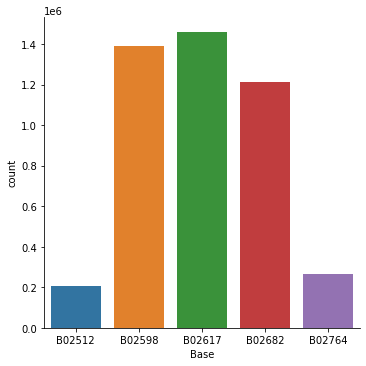

In [ ]:
sns.catplot(x='Base', data=df, kind='count')

In [59]:
df1 = df.groupby(['hour', 'month'])['hour'].count().unstack('month')

In [60]:
df1.head()

month,4,5,6,7,8,9
hour,,,,,,
0,11910,13875,14514,17953,21451,24133
1,7769,8186,9167,11527,14471,16107
2,4935,5372,6189,8562,10105,10702
3,5040,5946,6937,9199,10376,10789
4,6095,6945,7701,10040,11774,12675


Text(0, 0.5, 'Total')

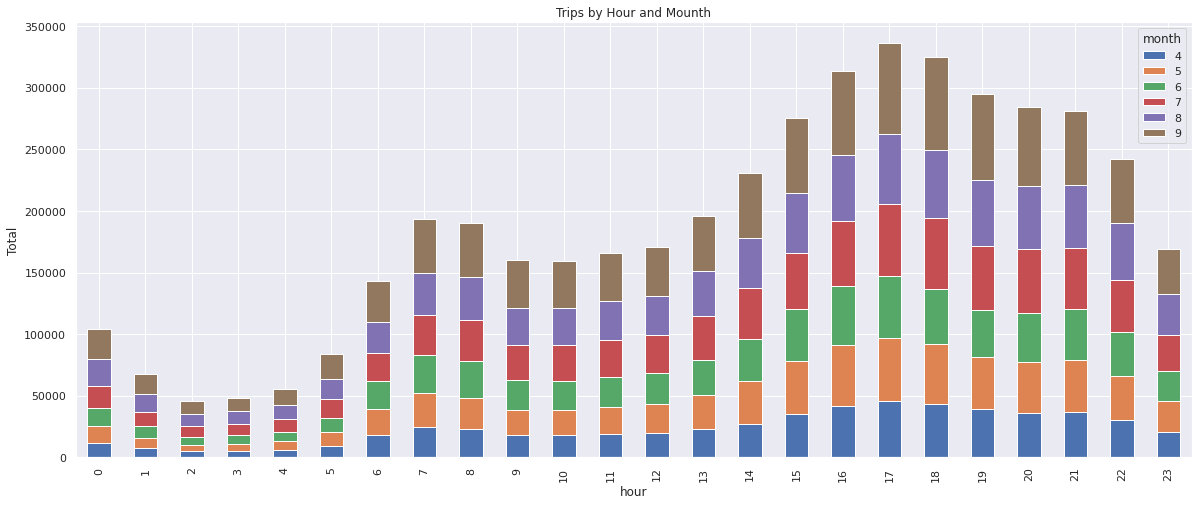

In [67]:
#Plotting the trips by the hours in a day
sns.set()
df1.plot(kind = 'bar', stacked = True, title = 'Trips by Hour and Mounth',figsize=(20,8))
plt.ylabel('Total')

Text(0, 0.5, 'Total')

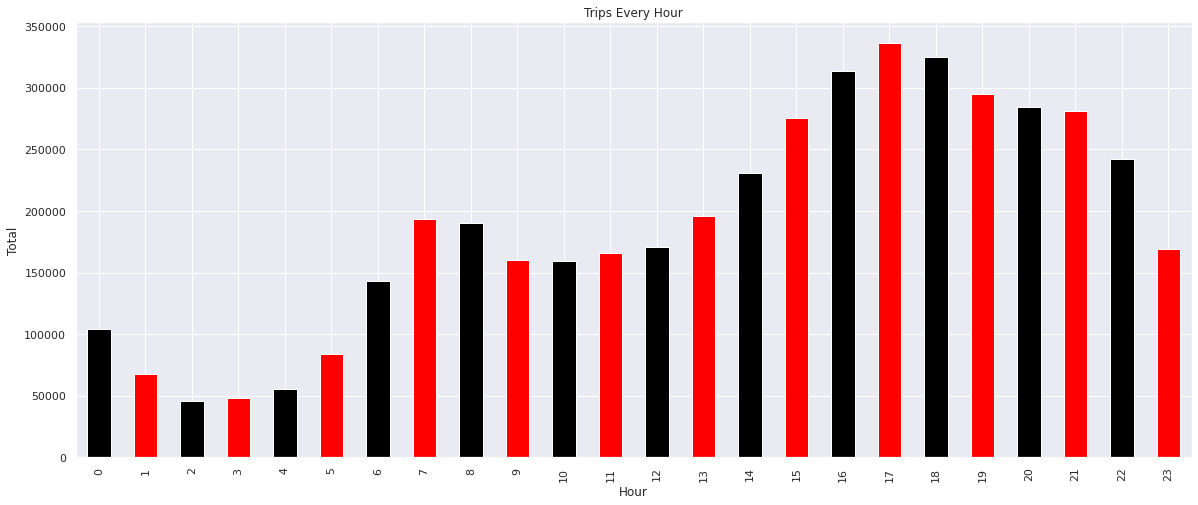

In [75]:
sns.set()
df.hour.value_counts(sort = False).plot(kind = 'bar', title = 'Trips Every Hour', color = ['black', 'red'],figsize=(20,8)).set_xlabel('Hour')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

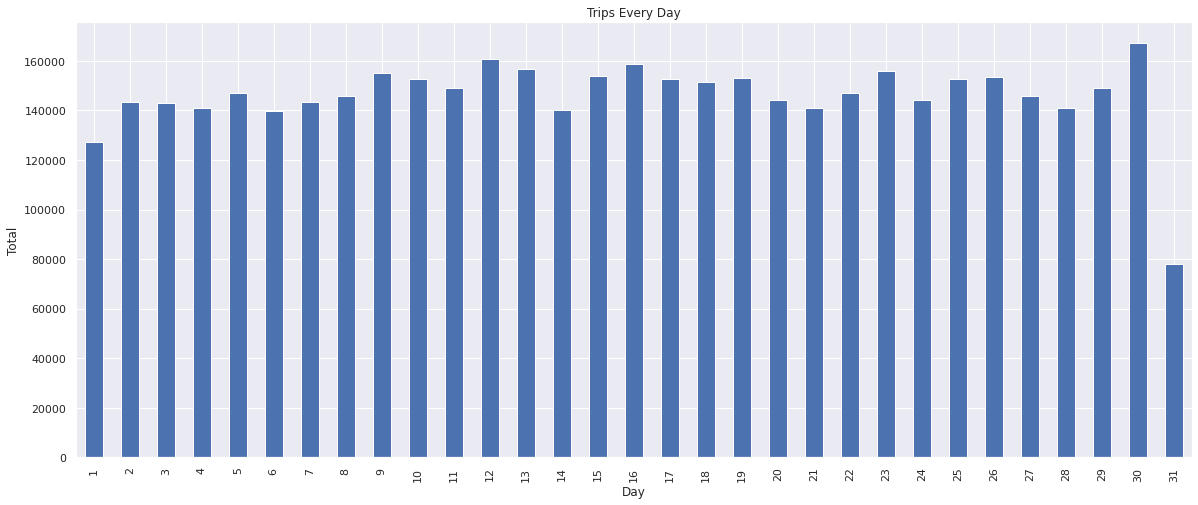

In [76]:
sns.set()
df.day.value_counts().sort_index().plot(kind = 'bar',title = 'Trips Every Day',figsize=(20,8)).set_xlabel('Day')
plt.ylabel('Total')

In [ ]:
# Cleaning the dataset
del df['Lat'],df['Lon']

In [ ]:
tym = df.groupby('date')

In [ ]:
tym.tail()

,Date/Time,Base,date,month,day,hour,day_of_week
554926,2014-04-01 23:21:00,B02764,2014-04-01,4,1,23,Tuesday
554927,2014-04-01 23:25:00,B02764,2014-04-01,4,1,23,Tuesday
554928,2014-04-01 23:38:00,B02764,2014-04-01,4,1,23,Tuesday
554929,2014-04-01 23:41:00,B02764,2014-04-01,4,1,23,Tuesday
554930,2014-04-01 23:46:00,B02764,2014-04-01,4,1,23,Tuesday
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,B02764,2014-09-30,9,30,22,Tuesday
1028132,2014-09-30 22:57:00,B02764,2014-09-30,9,30,22,Tuesday
1028133,2014-09-30 22:58:00,B02764,2014-09-30,9,30,22,Tuesday
1028134,2014-09-30 22:58:00,B02764,2014-09-30,9,30,22,Tuesday


In [ ]:
type(tym)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
data = pd.DataFrame(tym.size().reset_index(name = "Group_Count"))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         183 non-null    object
 1   Group_Count  183 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
data["date"]= pd.to_datetime(data["date"])

In [ ]:
# split into train test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.1)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(train['Group_Count'],trend='add').fit()
test_predictions = double_model.forecast(28).rename('DES Forecast')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
ann = df.groupby('Date/Time')

In [ ]:
ann.head(5)

,Date/Time,Base,date,month,day,hour,day_of_week
0,2014-04-01 00:11:00,B02512,2014-04-01,4,1,0,Tuesday
1,2014-04-01 00:17:00,B02512,2014-04-01,4,1,0,Tuesday
2,2014-04-01 00:21:00,B02512,2014-04-01,4,1,0,Tuesday
3,2014-04-01 00:28:00,B02512,2014-04-01,4,1,0,Tuesday
4,2014-04-01 00:33:00,B02512,2014-04-01,4,1,0,Tuesday
...,...,...,...,...,...,...,...
1020853,2014-09-30 04:51:00,B02764,2014-09-30,9,30,4,Tuesday
1020854,2014-09-30 04:55:00,B02764,2014-09-30,9,30,4,Tuesday
1020872,2014-09-30 05:03:00,B02764,2014-09-30,9,30,5,Tuesday
1020885,2014-09-30 05:08:00,B02764,2014-09-30,9,30,5,Tuesday


In [34]:
type(ann)

pandas.core.groupby.generic.DataFrameGroupBy

In [37]:
data2 = pd.DataFrame(ann.size().reset_index(name = "Group_Count"))

In [40]:
data2.head()

,Date/Time,Group_Count
0,2014-04-01 00:00:00,3
1,2014-04-01 00:01:00,1
2,2014-04-01 00:02:00,3
3,2014-04-01 00:03:00,2
4,2014-04-01 00:04:00,1


In [46]:
# split into train test sets
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data2, test_size = 0.1)

In [43]:
x_train.head()

,Date/Time,Group_Count
145011,2014-07-12 15:15:00,23
31112,2014-04-23 07:39:00,20
80329,2014-05-28 01:35:00,2
237294,2014-09-15 01:00:00,3
60599,2014-05-14 03:26:00,1


In [44]:
# Part 2 - Now let make the ANN
from keras.models import Sequential
from keras.layers import Dense

In [48]:
# Initializing the ANN
classifier = Sequential()

In [49]:
# Adding the input layer and the first hidden layer relu(rectifier)
classifier.add(Dense(6, kernel_initializer= 'uniform', activation = 'relu', input_dim = 11))

In [50]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer= 'uniform', activation = 'relu' ))

In [51]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))

In [52]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to training set
classifier.fit(x_train, batch_size=10, epochs=100)